# 5501 - Assignment_1: Linear Regression

## `Name: Shiva Chakravarthy Gollapudi`
## `Student ID: 11468697`


In [ ]:
import warnings
warnings.filterwarnings('ignore') #ignorning warings

In [ ]:
#instal libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
#Import input data
data = pd.read_csv('monet.csv')
data.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2


In [ ]:
#Checking for Null values
data.isnull().sum()

PRICE      0
HEIGHT     0
WIDTH      0
SIGNED     0
PICTURE    0
HOUSE      0
dtype: int64

So, there is no null values in the input data.

In [ ]:
#Transformation of the data
#Size = Width * Height
data["SIZE"] = data["HEIGHT"] * data["WIDTH"] 
data.head()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,SIZE
0,3.993780,21.3,25.6,1,1,1,545.28
1,8.800000,31.9,25.6,1,2,2,816.64
2,0.131694,6.9,15.9,0,3,3,109.71
3,2.037500,25.7,32.0,1,4,2,822.40
4,1.487500,25.7,32.0,1,4,2,822.40


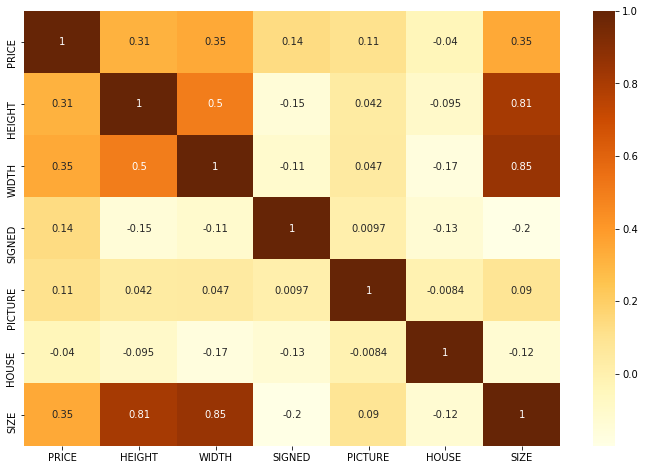

In [ ]:
# finding corelation between the data
plt.subplots(figsize = (12,8))
sns.heatmap(data.corr(), cmap='YlOrBr', annot=True)
plt.show()

From the above map, we conclude that PRICE is correlated to width and size. And also we know that height and width are corelated to size.

1.   List item
2.   List item



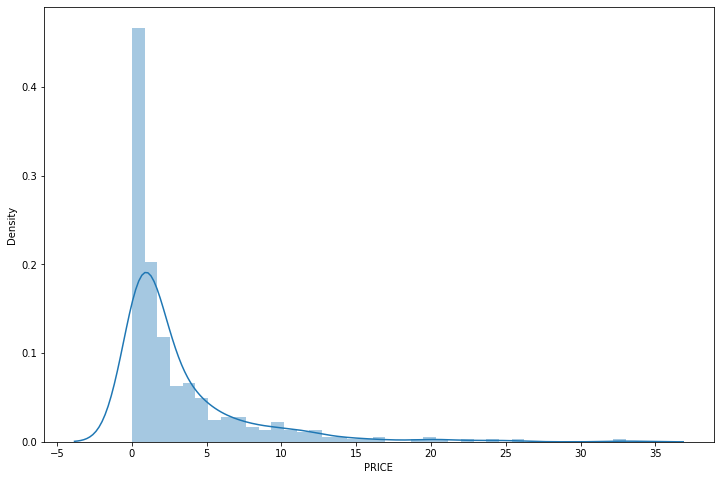

In [ ]:
#checking the distribution of dependent variable(PRICE)
plt.subplots(figsize = (12,8))
sns.distplot(data["PRICE"])
plt.show(); 

From the above figure, we can say that PRICE is not normally distributed and there are few oultliers(Right skewed). 

##  **Model 1:** 

### Creating a model using Size as the independent variable and Price as dependent variable. 


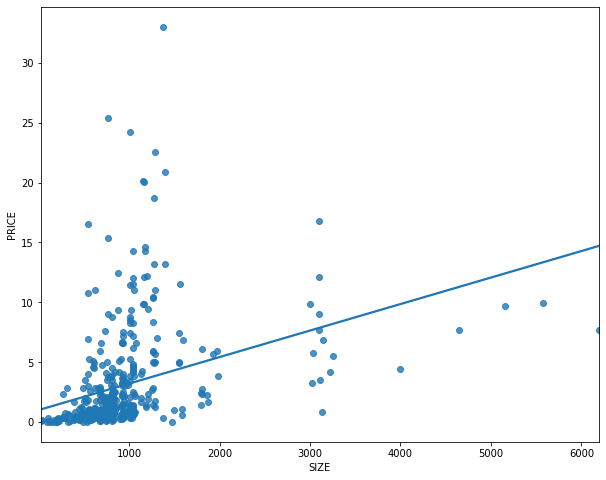

In [ ]:
plt.subplots(figsize = (10,8))
sns.regplot(x = data.SIZE, y = data.PRICE, ci=None);
plt.show();

### Creating Linear regression Model

In [ ]:
# Split the data into test and train.
# Considering training/test as 80/20.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['SIZE']], data['PRICE'], train_size = 0.8)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((344, 1), (86, 1), (344,), (86,))

In [ ]:
# builing Linear Regression

from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
mode11  = lr.fit (X_train, y_train) # Fit the model into the training data

In [ ]:
y_test_pred = mode11.predict (X_test) # Predicting the y value using x for test data.

In [ ]:
# Calculate the error of the prediction with test data.
# Finding mean square error, R2_Score and Root mean square error.

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error (y_test, y_test_pred)
print('MSE for the test set: {:.2f}'.format(mse))

r2 = r2_score (y_test, y_test_pred)
print('R2_Score for the test set: {:.2f}'.format(r2))

import math 
RMSE = math.sqrt(mse)
print('RMSE for the test set: {:.2f}'.format(RMSE))

MSE for the test set: 18.45
R2_Score for the test set: 0.04
RMSE for the test set: 4.30


##  **Model 2:** 

### Creating a model using Width as the independent variable and Price as dependent variable. 

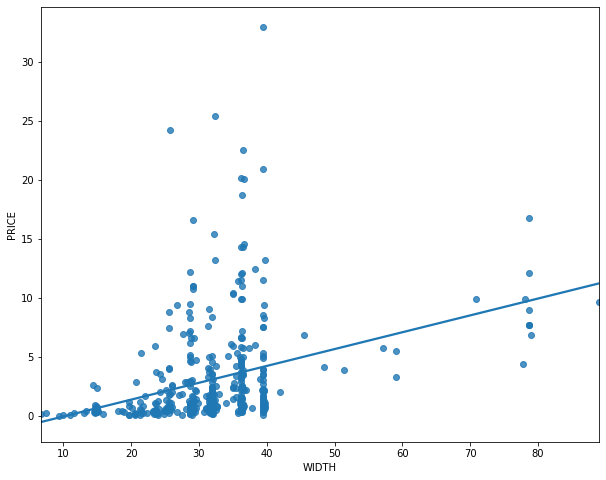

In [ ]:
plt.subplots(figsize = (10,8))
sns.regplot(x = data.WIDTH, y = data.PRICE, ci=None);
plt.show();

### Creating Linear regression Model

In [ ]:
# Split the data into test and train.
# Considering training/test as 80/20.

X_train.shape
X_train, X_test, y_train, y_test = train_test_split(data[['WIDTH']], data['PRICE'], train_size = 0.8)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((344, 1), (86, 1), (344,), (86,))

In [ ]:
# builing Linear Regression

from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
mode11  = lr.fit (X_train, y_train) # Fit the model into the training data

In [ ]:
y_test_pred = mode11.predict (X_test) # Predicting the y value using x for test data.

In [ ]:
# Calculate the error of the prediction with test data.
# Finding mean square error, R2_Score and Root mean square error.

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error (y_test, y_test_pred)
print('MSE for the test set: {:.2f}'.format(mse))

r2 = r2_score (y_test, y_test_pred)
print('R2_Score for the test set: {:.2f}'.format(r2))

import math 
RMSE = math.sqrt(mse)
print('RMSE for the test set: {:.2f}'.format(RMSE))

MSE for the test set: 15.69
R2_Score for the test set: 0.09
RMSE for the test set: 3.96


## Model 3: Multivariate Linear Regression model




In [ ]:
# Create dummy columns of the HOUSE variable
Houses_dummy = pd.get_dummies(data['HOUSE '], prefix='HOUSE')
data=data.join(Houses_dummy) # Join the all join House colums 

In [ ]:
data.head()

In [ ]:
y = data["PRICE"]
x = data[["SIGNED","PICTURE","SIZE","HOUSE_1","HOUSE_2","HOUSE_3"]]
x.head()

,SIGNED,PICTURE,SIZE,HOUSE_1,HOUSE_2,HOUSE_3
0,1,1,545.28,1,0,0
1,1,2,816.64,0,1,0
2,0,3,109.71,0,0,1
3,1,4,822.40,0,1,0
4,1,4,822.40,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[['WIDTH']], data['PRICE'], train_size = 0.8)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((344, 1), (86, 1), (344,), (86,))

In [ ]:
# Builing Multiple Linear Regression 

from sklearn.linear_model import LinearRegression 
mlr = LinearRegression()
mode13  = mlr.fit (X_train, y_train) # Fit the model into the training data

In [ ]:
y_test_pred = mode11.predict (X_test) # Predicting the y value using x for test data.

In [ ]:
# Calculate the error of the prediction with test data.
# Finding mean square error, R2_Score and Root mean square error.

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error (y_test, y_test_pred)
print('MSE for the test set: {:.2f}'.format(mse))

r2 = r2_score (y_test, y_test_pred)
print('R2_Score for the test set: {:.2f}'.format(r2))

import math 
RMSE = math.sqrt(mse)
print('RMSE for the test set: {:.2f}'.format(RMSE))

MSE for the test set: 11.61
R2_Score for the test set: 0.11
RMSE for the test set: 3.41


In [ ]:
______________END________________